In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://kb:' + password + '@localhost/bank'
engine = create_engine(connection_string)
# data = pd.read_sql_query('SELECT * FROM loan', engine)
# data.head()

In [3]:
query = '''select name, title, rental_duration, rental_rate, length, replacement_cost, rating, special_features
from sakila.film_category
join sakila.category using (category_id)
join sakila.film using (film_id)
where category_id in (15,9,8,6)
;'''

data = pd.read_sql_query(query, engine)
data.head()

,name,title,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,Documentary,ACADEMY DINOSAUR,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,Documentary,ADAPTATION HOLES,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes"
2,Documentary,ARMY FLINTSTONES,4,0.99,148,22.99,R,"Trailers,Commentaries"
3,Documentary,BEACH HEARTBREAKERS,6,2.99,122,16.99,G,"Deleted Scenes,Behind the Scenes"
4,Documentary,BED HIGHBALL,5,2.99,106,23.99,NC-17,"Trailers,Commentaries,Deleted Scenes"


In [6]:
data['rental_duration'].value_counts()

6    64
3    60
5    58
4    55
7    47
Name: rental_duration, dtype: int64

In [7]:
data['rating'].value_counts()

PG       64
R        60
NC-17    56
PG-13    56
G        48
Name: rating, dtype: int64

In [14]:
data.groupby(['name','special_features']).size()

name         special_features                                      
Documentary  Behind the Scenes                                         9
             Commentaries                                              3
             Commentaries,Behind the Scenes                            6
             Commentaries,Deleted Scenes                               2
             Commentaries,Deleted Scenes,Behind the Scenes             6
             Deleted Scenes                                            7
             Deleted Scenes,Behind the Scenes                          4
             Trailers                                                  5
             Trailers,Behind the Scenes                                6
             Trailers,Commentaries                                     5
             Trailers,Commentaries,Deleted Scenes                      4
             Trailers,Commentaries,Deleted Scenes,Behind the Scenes    5
             Trailers,Deleted Scenes                    

In [9]:
data.shape

(284, 8)

In [10]:
data.dtypes

name                 object
title                object
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
special_features     object
dtype: object

In [11]:
data.isna().sum()

name                0
title               0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
dtype: int64

In [18]:
import numpy as np
num=data.select_dtypes(np.number)

/Users/kb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


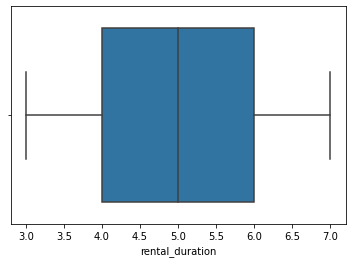

/Users/kb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


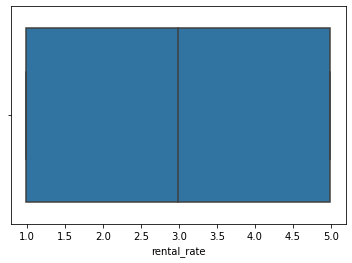

/Users/kb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


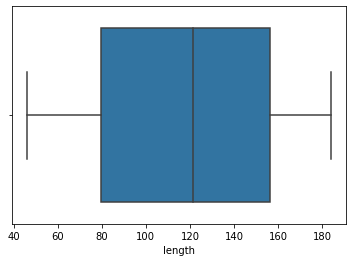

/Users/kb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


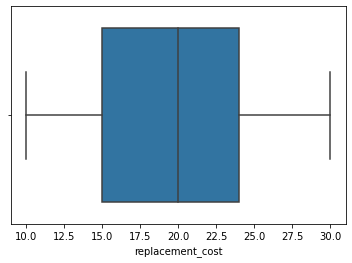

In [19]:
#check for out liers
for i in num.columns:
    sns.boxplot(num[i])
    plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

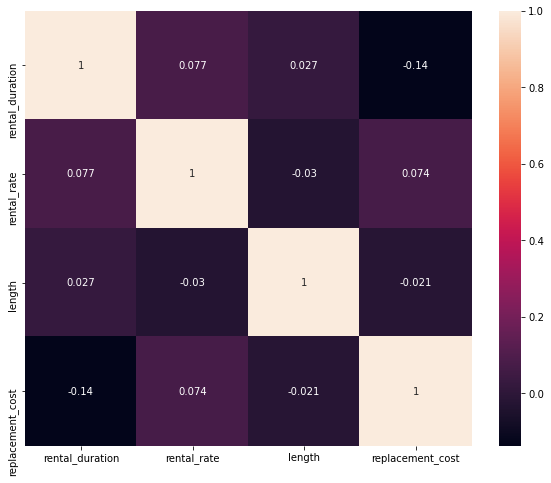

In [16]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

/Users/kb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


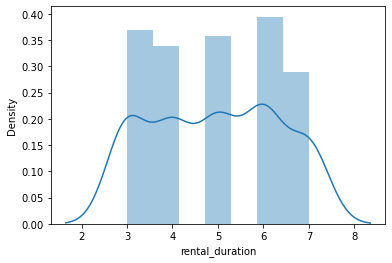

/Users/kb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


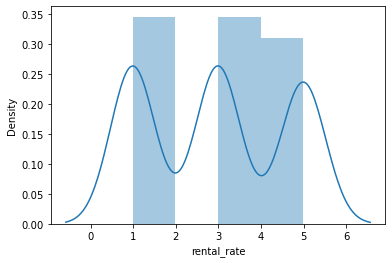

/Users/kb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


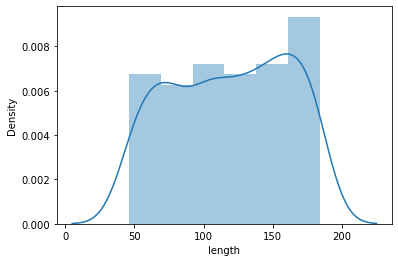

/Users/kb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


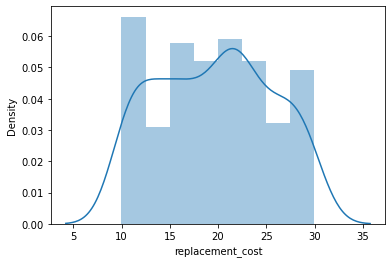

In [20]:
for i in num.columns:
    sns.distplot(data[i])
    plt.show()

In [169]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import StandardScaler
import numpy as np


# Normalizing data
transformer = Normalizer().fit(num)
num_normalized = transformer.transform(num)
x = pd.DataFrame(num_normalized, columns=num.columns)

In [170]:
transformer = StandardScaler().fit(num)
xstandardized=transformer.transform(num)
xstandardized=pd.DataFrame(xstandardized)

In [171]:
cat = data.select_dtypes(include = np.object)
cat = cat.drop(['name'], axis=1)
cat = cat.drop(['title'], axis=1)
categorical = pd.get_dummies(cat, columns=['rating', 'special_features'])

<ipython-input-171-1ac65a90242b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = data.select_dtypes(include = np.object)


In [172]:
y = data['name']
X = pd.DataFrame(np.concatenate((xstandardized, categorical), axis=1))

In [173]:
categorical

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Behind the Scenes,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
280,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
282,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [174]:
X.columns=x.columns.append(categorical.columns)

In [175]:
X.head()

,rental_duration,rental_rate,length,replacement_cost,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Behind the Scenes,...,special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
0,0.764395,-1.193291,-0.773018,0.234136,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.485619,0.043551,-1.626326,-0.102546,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.678052,-1.193291,0.696567,0.570819,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.764395,0.043551,0.080290,-0.439228,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.043172,0.043551,-0.298958,0.739160,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [197]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [198]:
classification.score(X_test, y_test)

0.22807017543859648

In [199]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.22807017543859648

In [200]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.22807017543859648

In [201]:
pd.Series(predictions).value_counts()

Documentary    21
Foreign        19
Sports          9
Family          8
dtype: int64

In [202]:
y_test

179        Foreign
132         Family
234         Sports
69          Family
191        Foreign
154        Foreign
216         Sports
64     Documentary
177        Foreign
268         Sports
250         Sports
281         Sports
60     Documentary
189        Foreign
255         Sports
269         Sports
243         Sports
260         Sports
220         Sports
117         Family
59     Documentary
161        Foreign
201        Foreign
197        Foreign
128         Family
110         Family
99          Family
46     Documentary
41     Documentary
224         Sports
249         Sports
1      Documentary
23     Documentary
253         Sports
108         Family
159        Foreign
98          Family
171        Foreign
144        Foreign
246         Sports
103         Family
182        Foreign
262         Sports
232         Sports
40     Documentary
112         Family
32     Documentary
239         Sports
75          Family
124         Family
85          Family
136         Family
186        F

In [203]:
predictions[:10]

array(['Foreign', 'Family', 'Foreign', 'Sports', 'Documentary', 'Foreign',
       'Documentary', 'Documentary', 'Documentary', 'Foreign'],
      dtype=object)

[[4 2 3 2]
 [4 2 5 3]
 [7 1 4 1]
 [6 3 7 3]]


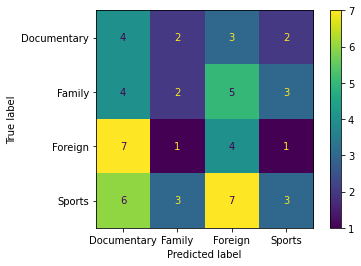

In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show() 

In [205]:
classification.predict_proba(X_test)

array([[0.2656871 , 0.21395258, 0.31415658, 0.20620374],
       [0.30865594, 0.32661369, 0.16957462, 0.19515574],
       [0.21508545, 0.24762229, 0.27979481, 0.25749745],
       [0.25476595, 0.21244337, 0.19953313, 0.33325755],
       [0.33344139, 0.28863532, 0.22123868, 0.15668461],
       [0.12112747, 0.07858267, 0.51924902, 0.28104084],
       [0.34624786, 0.20020143, 0.13612208, 0.31742862],
       [0.40110235, 0.26139799, 0.16649081, 0.17100885],
       [0.49195033, 0.14880796, 0.22723912, 0.13200258],
       [0.21972935, 0.16854378, 0.3152249 , 0.29650197],
       [0.21340011, 0.08674627, 0.53900816, 0.16084546],
       [0.05638488, 0.53496583, 0.18062427, 0.22802501],
       [0.20066785, 0.24515098, 0.28968898, 0.26449219],
       [0.05560184, 0.42446991, 0.21725241, 0.30267584],
       [0.26586804, 0.42772666, 0.18220204, 0.12420325],
       [0.26974078, 0.12821936, 0.36317993, 0.23885992],
       [0.4316489 , 0.14788286, 0.11214234, 0.30832589],
       [0.09691909, 0.15954925,

In [206]:
classification.predict_proba(X_test)[::,0]

array([0.2656871 , 0.30865594, 0.21508545, 0.25476595, 0.33344139,
       0.12112747, 0.34624786, 0.40110235, 0.49195033, 0.21972935,
       0.21340011, 0.05638488, 0.20066785, 0.05560184, 0.26586804,
       0.26974078, 0.4316489 , 0.09691909, 0.49959222, 0.34904065,
       0.1864828 , 0.54589366, 0.20597122, 0.35786987, 0.34032575,
       0.03689034, 0.20766722, 0.22684113, 0.1912458 , 0.07485314,
       0.29805173, 0.18618342, 0.26589317, 0.50194775, 0.16182024,
       0.42669472, 0.18738738, 0.0615787 , 0.30629826, 0.47012095,
       0.10834999, 0.28887214, 0.24396301, 0.41781979, 0.31565644,
       0.32694971, 0.25543529, 0.03851348, 0.19411662, 0.71096972,
       0.28425577, 0.03650277, 0.45701193, 0.23818855, 0.53761967,
       0.43368408, 0.16517316])

In [207]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

In [208]:
y

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [209]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3


In [210]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [211]:
X_test

,rental_duration,rental_rate,length,replacement_cost,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Behind the Scenes,...,special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
179,0.764395,1.280393,-1.484108,-1.617616,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.043172,-1.193291,1.336548,-0.439228,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
234,1.485619,1.280393,0.222508,1.412524,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.043172,1.280393,-0.630800,-0.439228,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,-1.399275,-1.193291,-0.464879,-1.280934,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
154,0.043172,1.280393,0.838785,-0.439228,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,-1.399275,0.043551,-1.152266,0.570819,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,-1.399275,-1.193291,-1.152266,-0.775910,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,-0.678052,0.043551,-0.488582,0.402478,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.043172,1.280393,0.933597,-1.449275,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
z=data['title']
z_train, z_test = train_test_split(z, test_size=0.4, random_state=100)

In [213]:
X_test['title']=z_test

In [214]:
X_test['predictions']=predictions

In [215]:
X_test['category']=y_test

In [216]:
X_test[['title', 'category','predictions']]

,title,category,predictions
179,MATRIX SNOWMAN,Foreign,Foreign
132,SPLASH GUMP,Family,Family
234,HOLES BRANNIGAN,Sports,Foreign
69,APACHE DIVINE,Family,Sports
191,PET HAUNTING,Foreign,Documentary
154,DOUBTFIRE LABYRINTH,Foreign,Foreign
216,CHANCE RESURRECTION,Sports,Documentary
64,WEDDING APOLLO,Documentary,Documentary
177,LOST BIRD,Foreign,Documentary
268,SECRETARY ROUGE,Sports,Foreign
